In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

import pandas as pd


import math


#verbose = True
verbose = False

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Calorimeter Hits Analysis
Look at basic hit information for the calorimeter


In [199]:

gen_events = ur.open('sim_gen-100evts.root:events')

#gen_events = ur.open('sim_gen-q2min-100-1k.root:events')

#gen_events = ur.open('sim_gen-1500evts.root:events')


In [200]:
hit_collections = [
    'EcalBarrelHits',
    'EcalEndcapNHits',
    'EcalEndcapPHits',
    'HcalBarrelHits',
    'HcalHadronEndcapHits',
    'HcalElectronEndcapHits',
]




In [201]:
def get_position_vector(varname='EcalBarrelHits'):
    x = gen_events["%s.position.x"%varname].array()
    y = gen_events["%s.position.y"%varname].array()
    z = gen_events["%s.position.z"%varname].array()    
    return x, y, z

In [202]:
def rho_theta_phi_from_xyz( x, y, z ):
    rho = np.sqrt( x*x + y*y )
    theta = np.arctan2( rho, z )
    phi = np.arctan2( y, x )
    return rho, theta, phi

In [203]:
hit_x = {}
hit_y = {}
hit_z = {}



hit_rho = {}
hit_theta = {}
hit_phi = {}

for cn in hit_collections :
    hit_x[cn], hit_y[cn], hit_z[cn] = get_position_vector( cn )
    hit_rho[cn], hit_theta[cn], hit_phi[cn] = rho_theta_phi_from_xyz( hit_x[cn], hit_y[cn], hit_z[cn])



In [204]:

for cn in hit_collections :
    for ei in range(1):
        print( 'event %3d has %5d hits in %s' % (ei, len(hit_x[cn][ei]),  cn) )
        max = 10
        if len(hit_x[cn][ei]) < max : max = len(hit_x[cn][ei])
        for hi in range(max):
            print(' %25s hit %3d : x,y,z = (%7.1f, %7.1f, %7.1f), rho,theta,phi = (%6.1f, %7.3f, %7.3f)' %
                 ( cn, hi, 
                  hit_x[cn][ei][hi], hit_y[cn][ei][hi], hit_z[cn][ei][hi], 
                  hit_rho[cn][ei][hi], hit_theta[cn][ei][hi], hit_phi[cn][ei][hi]))



event   0 has  1787 hits in EcalBarrelHits
            EcalBarrelHits hit   0 : x,y,z = (  -58.0,   955.3,  -193.9), rho,theta,phi = ( 957.0,   1.771,   1.631)
            EcalBarrelHits hit   1 : x,y,z = (  -59.0,   966.8,  -195.9), rho,theta,phi = ( 968.6,   1.770,   1.632)
            EcalBarrelHits hit   2 : x,y,z = (  -59.5,   978.4,  -198.4), rho,theta,phi = ( 980.2,   1.770,   1.632)
            EcalBarrelHits hit   3 : x,y,z = (  -60.5,   989.9,  -200.4), rho,theta,phi = ( 991.7,   1.770,   1.632)
            EcalBarrelHits hit   4 : x,y,z = (  -63.0,  1001.5,  -202.4), rho,theta,phi = (1003.4,   1.770,   1.634)
            EcalBarrelHits hit   5 : x,y,z = (  -61.5,  1024.6,  -206.9), rho,theta,phi = (1026.4,   1.770,   1.631)
            EcalBarrelHits hit   6 : x,y,z = (  -23.0,  1013.0,  -220.9), rho,theta,phi = (1013.3,   1.785,   1.593)
            EcalBarrelHits hit   7 : x,y,z = (  -23.0,  1013.0,  -220.4), rho,theta,phi = (1013.3,   1.785,   1.593)
            EcalBarre

## Histograms


In [205]:

#hit_collection_name = 'EcalBarrelHits'
#hit_collection_name = 'EcalEndcapNHits'
hit_collection_name = 'EcalEndcapPHits'

#hit_collection_name = 'HcalBarrelHits'
#hit_collection_name = 'HcalHadronEndcapHits'
#hit_collection_name = 'HcalElectronEndcapHits'

df_dict = {}
df_dict['x'] = ak.flatten(hit_x[hit_collection_name], axis=None)
df_dict['y'] = ak.flatten(hit_y[hit_collection_name], axis=None)
df_dict['z'] = ak.flatten(hit_z[hit_collection_name], axis=None)
df_dict['rho'] = ak.flatten(hit_rho[hit_collection_name], axis=None)
df_dict['theta'] = ak.flatten(hit_theta[hit_collection_name], axis=None)
df_dict['phi'] = ak.flatten(hit_phi[hit_collection_name], axis=None)


df = pd.DataFrame.from_dict(df_dict)

In [206]:
df

,x,y,z,rho,theta,phi
0,39.607319,-1446.020837,2534.50,1446.563168,0.518634,-1.543413
1,40.513185,-1449.401577,2534.50,1449.967672,0.519646,-1.542852
2,42.988059,-1445.114970,2534.50,1445.754215,0.518393,-1.541058
3,-605.858612,-1079.076384,2546.93,1237.525959,0.452295,-2.082396
4,-609.239353,-1079.982250,2546.93,1239.973488,0.453073,-2.084415
...,...,...,...,...,...,...
775805,247.041444,-705.603837,2954.83,747.600328,0.247809,-1.234020
775806,247.947311,-708.984577,2969.76,751.090540,0.247718,-1.234369
775807,248.853178,-712.365318,2984.69,754.580844,0.247628,-1.234715
775808,249.759044,-715.746058,2999.62,758.071237,0.247539,-1.235058


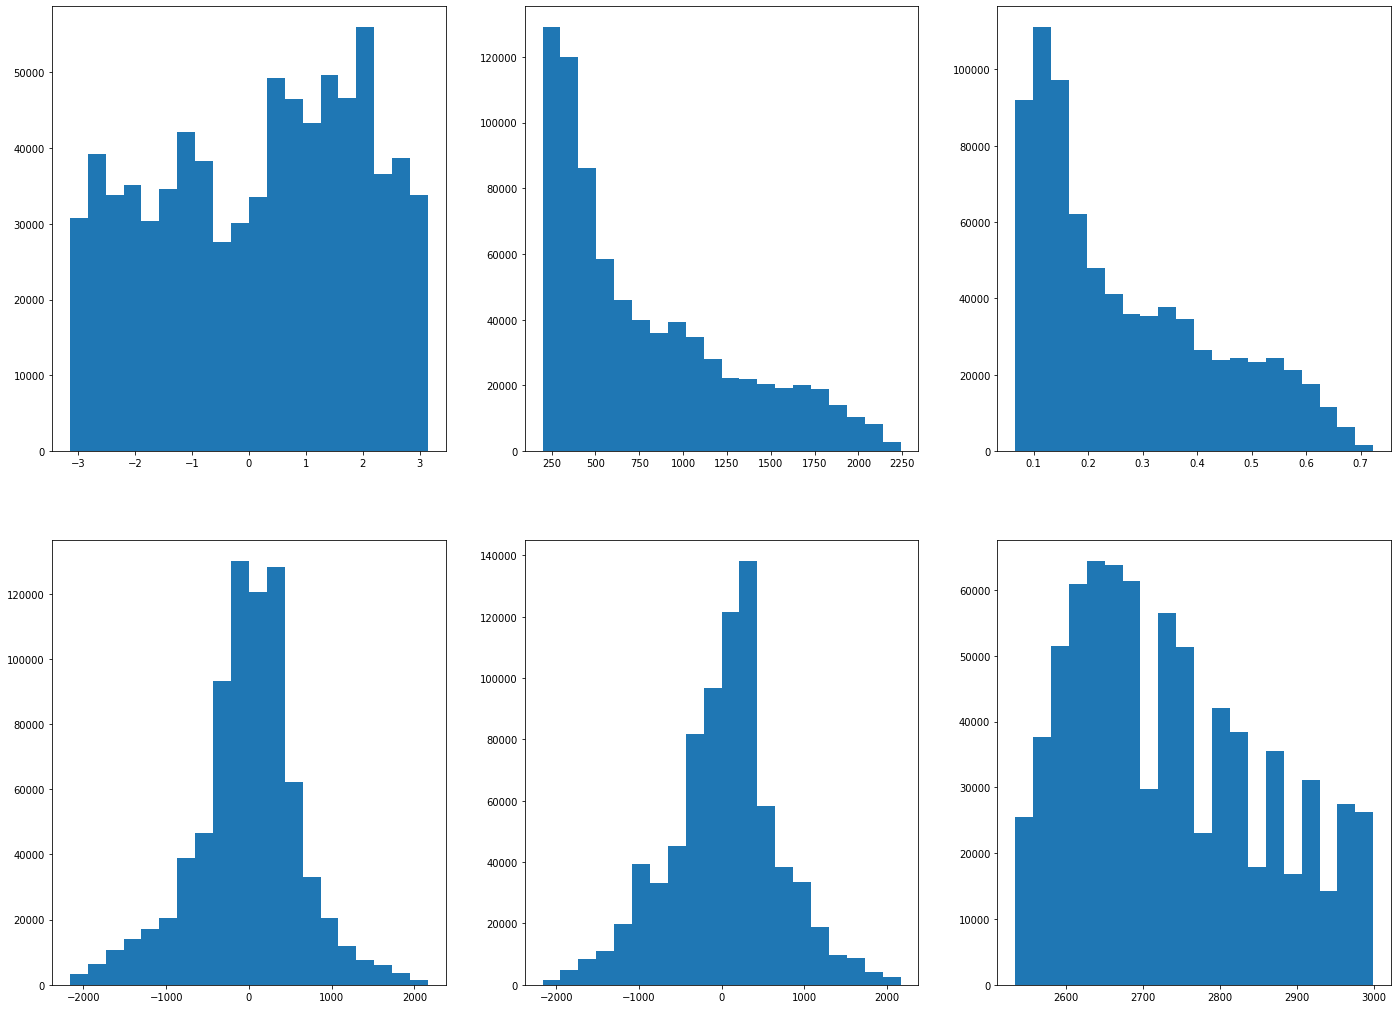

In [207]:
fig,ax = plt.subplots(2,3,figsize=(24,18))
ax[0][0].hist(df['phi'],bins=20)
ax[0][1].hist(df['rho'],bins=20)
ax[0][2].hist(df['theta'],bins=20)
ax[1][0].hist(df['x'],bins=20)
ax[1][1].hist(df['y'],bins=20)
ax[1][2].hist(df['z'],bins=20)
plt.show()

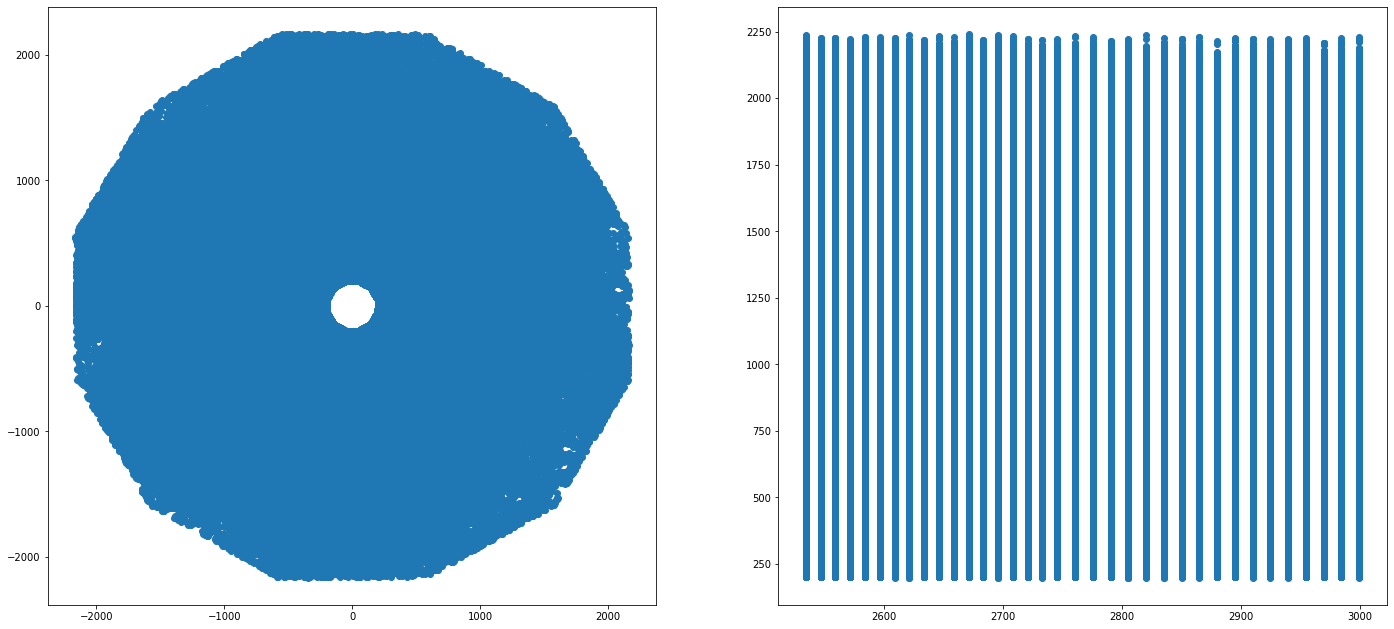

In [208]:
fig,ax = plt.subplots(1,2,figsize=(24,11))
ax = ax.flatten()
ax[0].scatter(df['x'],df['y'])
ax[1].scatter(df['z'],df['rho'])
plt.show()

# Ranges of geometry

In [209]:

print('theta:  %7.3f, %7.3f  (%7.1f, %7.1f)' % 
      ( np.min(df_dict['theta']), np.max(df_dict['theta']),
        180.*(np.min(df_dict['theta']))/3.14159265, 180.*(np.max(df_dict['theta']))/3.14159265,
      ) )

print('rho:    %7.1f, %7.1f' % ( np.min(df_dict['rho']), np.max(df_dict['rho'])) )
print('z:      %7.1f, %7.1f' % ( np.min(df_dict['z']), np.max(df_dict['z'])) )

theta:    0.066,   0.723  (    3.8,    41.4)
rho:      198.0,  2241.0
z:       2534.5,  2999.6
